# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

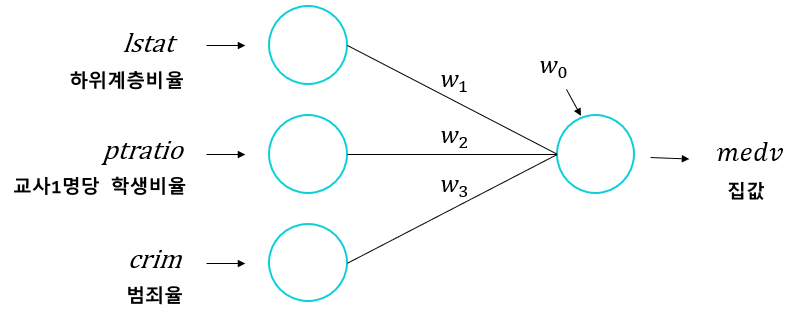

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [5]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [6]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [33]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential(
    Dense(1, input_shape = (nfeatures, ))
)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(learning_rate = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [34]:
model.compile(optimizer=Adam(learning_rate = 0.1), loss = 'mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [35]:
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.2).history

Epoch 1/30
11/11 [==============================] - 1s 21ms/step - loss: 548.3376 - val_loss: 555.5364
Epoch 2/30
11/11 [==============================] - 0s 6ms/step - loss: 467.7383 - val_loss: 479.7827
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 399.1837 - val_loss: 416.2487
Epoch 4/30
11/11 [==============================] - 0s 6ms/step - loss: 343.0191 - val_loss: 363.8485
Epoch 5/30
11/11 [==============================] - 0s 7ms/step - loss: 296.5282 - val_loss: 321.9111
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 260.7041 - val_loss: 288.4089
Epoch 7/30
11/11 [==============================] - 0s 6ms/step - loss: 231.8754 - val_loss: 262.6244
Epoch 8/30
11/11 [==============================] - 0s 8ms/step - loss: 210.7205 - val_loss: 242.5918
Epoch 9/30
11/11 [==============================] - 0s 7ms/step - loss: 193.5516 - val_loss: 226.8842
Epoch 10/30
11/11 [==============================] - 0s 7ms/step - loss: 180.8753

* 학습결과 그래프

In [36]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

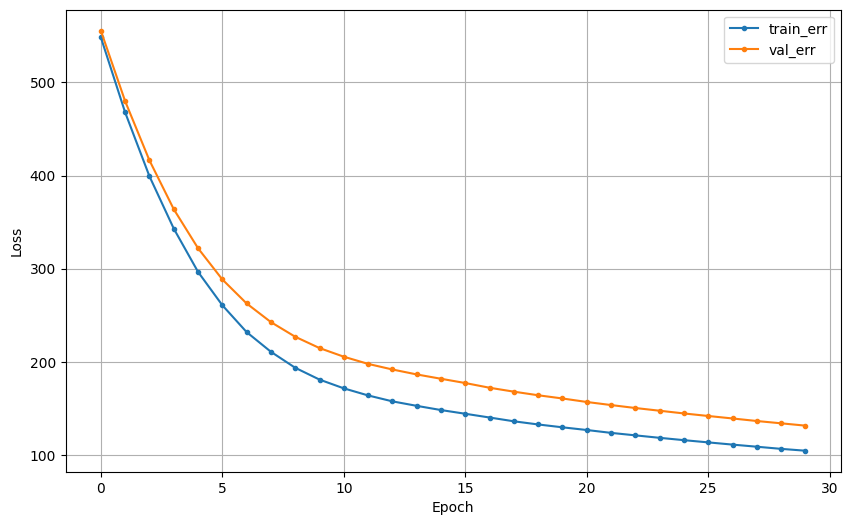

In [37]:
dl_history_plot(history)

### (3) 예측 및 검증

In [38]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [39]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 8.812466642478347
MAE  : 5.851102514827953
MAPE : 0.2981582567873242


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [40]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [41]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [42]:
nfeatures = x_train.shape[1]
nfeatures

12

In [43]:
# 메모리 정리
clear_session

# Sequential 타입 모델 선언
model2 = Sequential([
    Dense(1, input_shape = (nfeatures,))
])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [45]:
model2.compile(optimizer=Adam(learning_rate = 0.1), loss = 'mse')

* 학습

In [46]:
history = model2.fit(x_train, y_train, epochs = 30, validation_split=0.2).history

Epoch 1/30
11/11 [==============================] - 2s 46ms/step - loss: 492.9616 - val_loss: 430.5538
Epoch 2/30
11/11 [==============================] - 0s 20ms/step - loss: 323.4232 - val_loss: 297.3313
Epoch 3/30
11/11 [==============================] - 0s 13ms/step - loss: 221.6837 - val_loss: 225.6872
Epoch 4/30
11/11 [==============================] - 0s 30ms/step - loss: 173.9885 - val_loss: 191.4722
Epoch 5/30
11/11 [==============================] - 0s 23ms/step - loss: 153.0396 - val_loss: 174.0224
Epoch 6/30
11/11 [==============================] - 0s 18ms/step - loss: 140.3032 - val_loss: 159.4153
Epoch 7/30
11/11 [==============================] - 0s 14ms/step - loss: 129.4255 - val_loss: 146.5090
Epoch 8/30
11/11 [==============================] - 0s 9ms/step - loss: 119.7168 - val_loss: 133.8538
Epoch 9/30
11/11 [==============================] - 0s 15ms/step - loss: 110.6912 - val_loss: 122.6763
Epoch 10/30
11/11 [==============================] - 0s 22ms/step - loss: 

* 학습결과 그래프

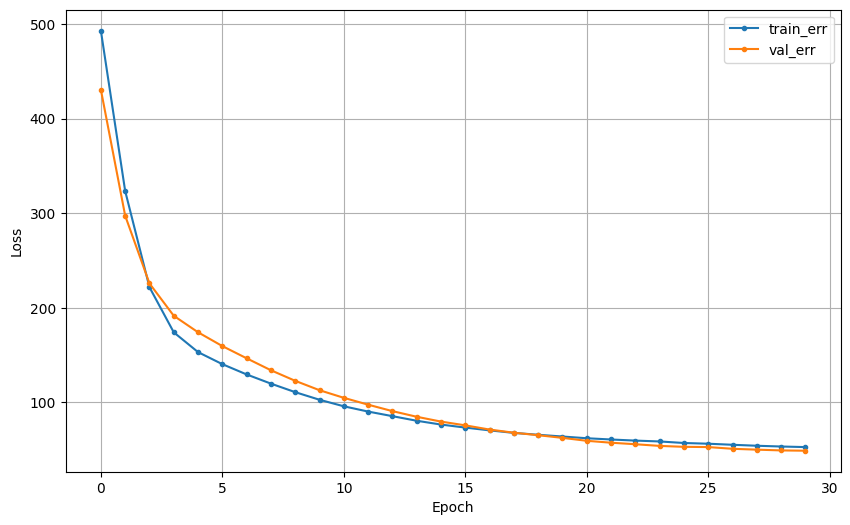

In [47]:
dl_history_plot(history)

* 예측 및 평가

In [48]:
pred2 = model2.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 6.291152550698278
MAE  : 4.6079045828651
MAPE : 0.22679710449062457


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [49]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [50]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [55]:
clear_session()

model3 = Sequential([
    Dense(1, input_shape = (nfeatures, ))
])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [64]:
model3.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

* 학습

In [65]:
history = model3.fit(x_train, y_train, epochs = 30, validation_split=0.2).history

Epoch 1/30
11/11 [==============================] - 1s 29ms/step - loss: 185.5035 - val_loss: 193.8070
Epoch 2/30
11/11 [==============================] - 0s 10ms/step - loss: 151.7590 - val_loss: 167.4174
Epoch 3/30
11/11 [==============================] - 0s 12ms/step - loss: 132.7756 - val_loss: 144.5504
Epoch 4/30
11/11 [==============================] - 0s 12ms/step - loss: 115.9696 - val_loss: 125.0851
Epoch 5/30
11/11 [==============================] - 0s 10ms/step - loss: 102.8098 - val_loss: 109.4342
Epoch 6/30
11/11 [==============================] - 0s 13ms/step - loss: 92.4876 - val_loss: 96.0423
Epoch 7/30
11/11 [==============================] - 0s 11ms/step - loss: 83.8673 - val_loss: 85.9956
Epoch 8/30
11/11 [==============================] - 0s 8ms/step - loss: 77.6452 - val_loss: 77.6716
Epoch 9/30
11/11 [==============================] - 0s 9ms/step - loss: 72.6228 - val_loss: 71.2193
Epoch 10/30
11/11 [==============================] - 0s 10ms/step - loss: 68.7964 -

* 학습결과 그래프

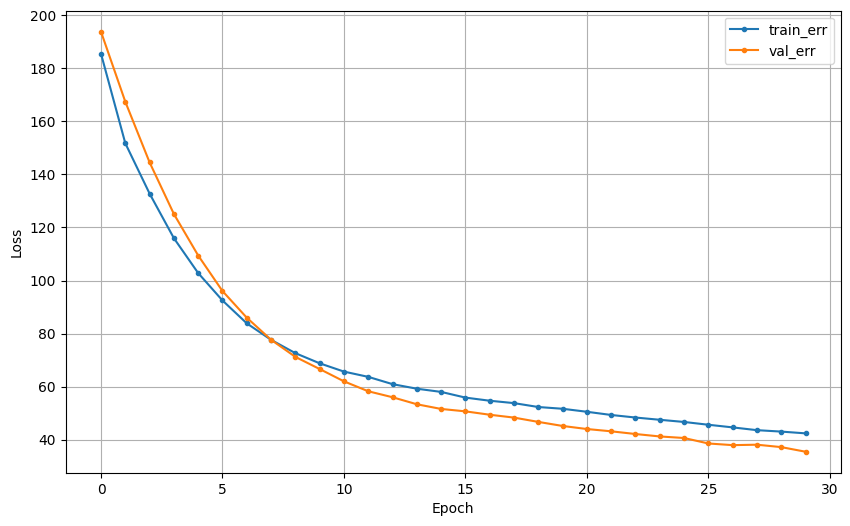

In [66]:
dl_history_plot(history)

* 예측 및 평가

In [67]:
pred3 = model3.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 6.291152550698278
MAE  : 4.6079045828651
MAPE : 0.22679710449062457


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [68]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [69]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [70]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [71]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(레이어 여러 개 입력은 리스트로)
model3 = Sequential([  Dense(2, input_shape = (nfeatures,), activation = 'relu'),
                       Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [72]:
model3.compile( optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [73]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 [==============================] - 1s 21ms/step - loss: 576.7009 - val_loss: 603.9780
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 529.1778 - val_loss: 556.9071
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 484.7772 - val_loss: 512.5263
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 444.3254 - val_loss: 471.1326
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 406.0593 - val_loss: 432.7677
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 371.3458 - val_loss: 397.5404
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 339.6484 - val_loss: 365.8253
Epoch 8/50
11/11 [==============================] - 0s 6ms/step - loss: 310.8770 - val_loss: 336.8679
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 284.8861 - val_loss: 310.7404
Epoch 10/50
11/11 [==============================] - 0s 6ms/step - loss: 261.8141

* 학습결과 그래프

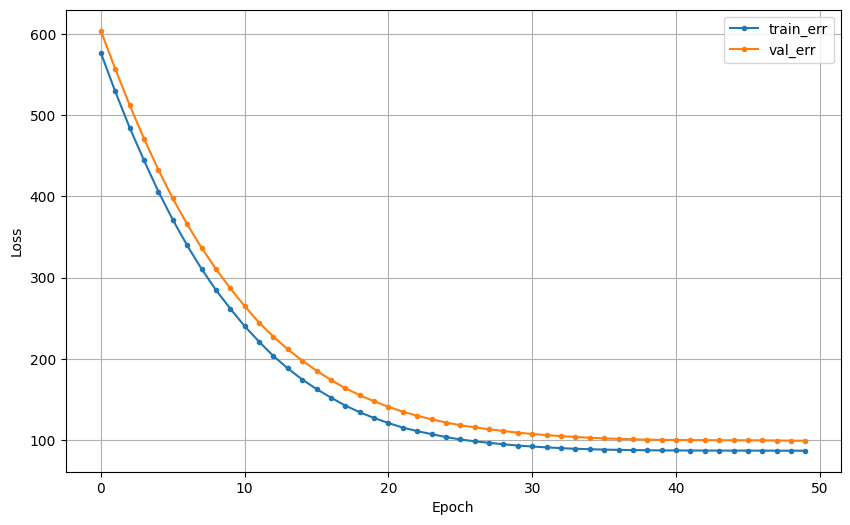

In [74]:
dl_history_plot(hist)

* 예측 및 평가

In [75]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 5ms/step
RMSE : 8.05252818804737
MAE  : 5.5057554880778
MAPE : 0.31990880972196833


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [93]:
clear_session()

model4 = Sequential([
    Dense(8, input_shape = (nfeatures,), activation = 'relu'),
    Dense(1)
])
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [94]:
model4.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

In [95]:
hist = model4.fit(x_train, y_train, epochs=50, validation_split= .2 ).history

Epoch 1/50
11/11 [==============================] - 3s 66ms/step - loss: 595.4568 - val_loss: 642.8877
Epoch 2/50
11/11 [==============================] - 0s 23ms/step - loss: 574.8863 - val_loss: 613.8513
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 537.0109 - val_loss: 560.6868
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 477.3324 - val_loss: 484.0949
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 396.4493 - val_loss: 394.1093
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 309.1196 - val_loss: 305.6097
Epoch 7/50
11/11 [==============================] - 0s 14ms/step - loss: 233.6846 - val_loss: 237.8900
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 183.7400 - val_loss: 198.2399
Epoch 9/50
11/11 [==============================] - 0s 12ms/step - loss: 155.7229 - val_loss: 178.6978
Epoch 10/50
11/11 [==============================] - 0s 17ms/step - loss: 

* 학습곡선

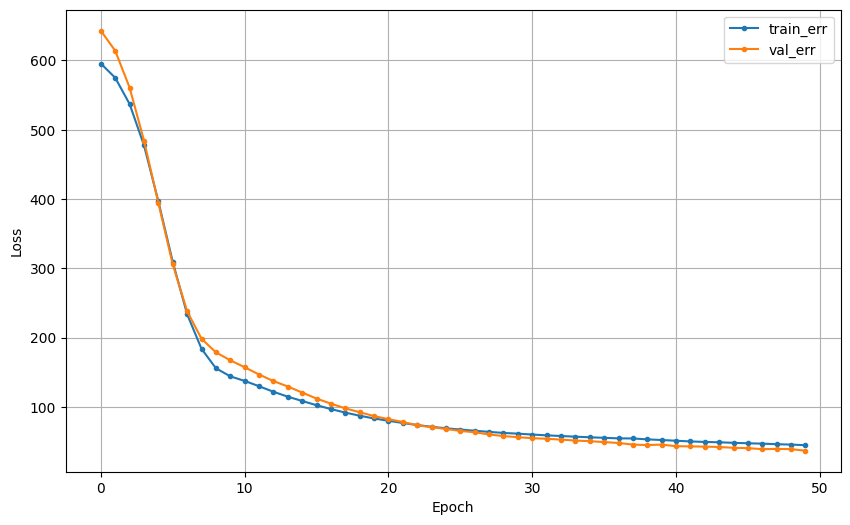

In [96]:
dl_history_plot(hist)

* 검증

In [97]:
pred3 = model4.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 9ms/step
RMSE : 5.98559497157647
MAE  : 4.641251722036625
MAPE : 0.23640344366137556


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [106]:
clear_session()

model5 = Sequential([
    Dense(8, input_shape = (nfeatures,), activation = 'relu'),
    Dense(4),
    Dense(1)
])
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [107]:
model5.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

In [108]:
hist = model5.fit(x_train, y_train, epochs=50, validation_split= .2 ).history

Epoch 1/50
11/11 [==============================] - 1s 25ms/step - loss: 568.4459 - val_loss: 571.5344
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 458.9522 - val_loss: 415.5415
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 282.3947 - val_loss: 230.1725
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 168.8011 - val_loss: 199.6247
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 157.8902 - val_loss: 158.9528
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 126.1262 - val_loss: 137.4591
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 109.5478 - val_loss: 113.0123
Epoch 8/50
11/11 [==============================] - 0s 8ms/step - loss: 92.9280 - val_loss: 92.2718
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 79.7176 - val_loss: 75.4715
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 70.3920 - va

* 학습곡선

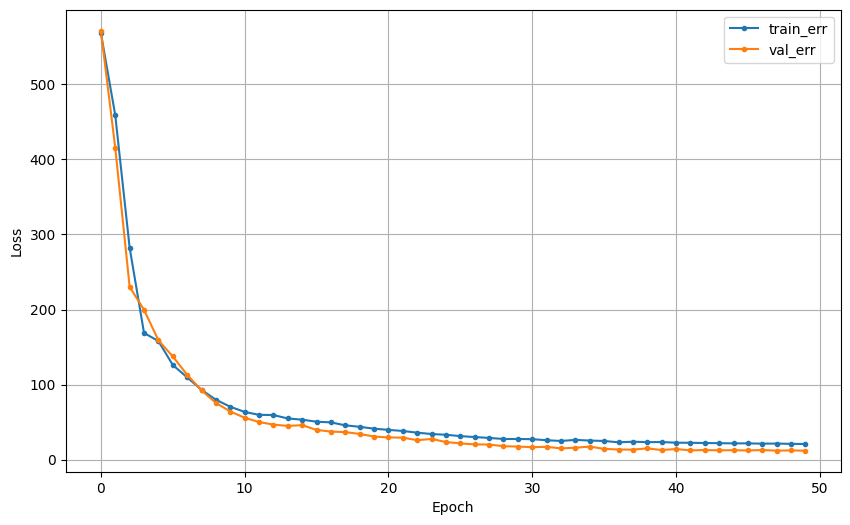

In [109]:
dl_history_plot(hist)


* 검증

In [102]:
pred3 = model5.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 4.126479267075074
MAE  : 3.1265346620597096
MAPE : 0.1643857865904632
